In [1]:
#Apply Logistic Regression and KNN classifier.
# Make Visualization for KNN classifier & Logistic Regression

# Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt



In [3]:
df = pd.read_csv('shoe.csv')

In [4]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


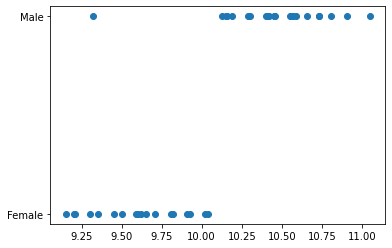

In [5]:
plt.scatter(df['size(cm)'], df['class(y)'])

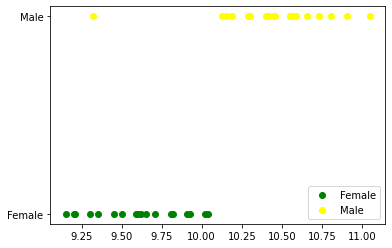

In [6]:
df0 = df[df['class(y)'] == 'Female']
df1 = df[df['class(y)'] == 'Male']

plt.scatter(df0['size(cm)'], df0['class(y)'], color='green', label='Female')
plt.scatter(df1['size(cm)'], df1['class(y)'], color='yellow', label='Male')

plt.legend()


In [7]:
#preprocessing
df['class(y)'] = df['class(y)'].replace(['Male', 'Female'], [1,0])

In [8]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   size(cm)  40 non-null     float64
 1   class(y)  40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(df[['size(cm)']], df['class(y)'], test_size=.30)

In [12]:
xtrain.head()

,size(cm)
32,10.40
2,10.41
15,10.73
30,10.04
7,10.57


In [13]:
ytrain.head()

32    1
2     1
15    1
30    0
7     1
Name: class(y), dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
reg = LogisticRegression()

In [16]:
reg.fit(xtrain, ytrain)

LogisticRegression()

In [17]:
reg.coef_

array([[2.07614768]])

In [18]:
reg.intercept_

array([-20.52159317])

In [19]:
reg.predict_proba(xtest)

array([[0.75205684, 0.24794316],
       [0.63391574, 0.36608426],
       [0.08167236, 0.91832764],
       [0.18773264, 0.81226736],
       [0.3011208 , 0.6988792 ],
       [0.61934478, 0.38065522],
       [0.80222722, 0.19777278],
       [0.10629305, 0.89370695],
       [0.14735842, 0.85264158],
       [0.68958722, 0.31041278],
       [0.47637928, 0.52362072],
       [0.16656903, 0.83343097]])

In [20]:
reg.predict(xtest)

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [21]:
ytest

21    0
24    0
4     1
19    1
26    1
9     0
36    0
13    1
29    1
0     0
17    0
23    1
Name: class(y), dtype: int64

In [22]:
ypred = reg.predict(xtest)
ypred

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [23]:
logit = reg.score(xtest, ytest)
logit

0.9166666666666666

# KNN Classifier

In [24]:
#import library
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns # analysis / visualization
sns.set(color_codes=True)
from seaborn import barplot
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

import warnings as w
w.filterwarnings('ignore')

In [25]:
KNN = KNeighborsClassifier(n_neighbors = 5)

In [26]:
KNN

KNeighborsClassifier()

In [27]:
KNN.fit(xtrain,ytrain)

KNeighborsClassifier()

In [28]:
ypred1 = KNN.predict(xtest)

In [29]:
ypred1

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [30]:
classification_report(ytest, ypred1)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       1.00      1.00      1.00         6\n\n    accuracy                           1.00        12\n   macro avg       1.00      1.00      1.00        12\nweighted avg       1.00      1.00      1.00        12\n'

In [31]:
print(classification_report(ytest, ypred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [32]:
CM = confusion_matrix(ytest, ypred1)
CM

array([[6, 0],
       [0, 6]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

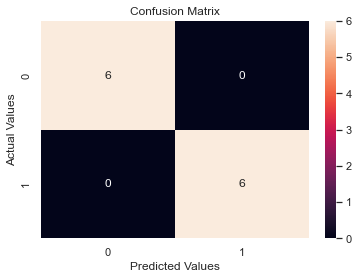

In [33]:
sns.heatmap(CM, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [34]:
tp, fn, fp, tn = confusion_matrix(ytest, ypred1).reshape(-1)

In [35]:
tp, fn, fp, tn

(6, 0, 0, 6)

In [36]:
accuracy_score(ytest, ypred1)

1.0

In [37]:
knn_accuracy=KNN.score(xtest, ytest)

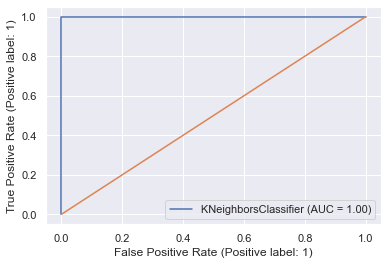

In [38]:
plot_roc_curve(KNN, xtest, ytest)
plt.plot([0,1],[0,1])

In [39]:
# Make Visualization for KNN Classifier & Logistic Regression 

In [40]:
# Creating DataFrame for All Accuracy
accuracy_df = pd.DataFrame([['KNeighbors Classifier', knn_accuracy], ['Logistic Regression', logit]], columns=['Algorithm Name', 'Accuracy'])

In [41]:
accuracy_df

,Algorithm Name,Accuracy
0,KNeighbors Classifier,1.000000
1,Logistic Regression,0.916667


In [42]:
accuracy_df.nlargest(1,'Accuracy') # largest accuracy

,Algorithm Name,Accuracy
0,KNeighbors Classifier,1.0


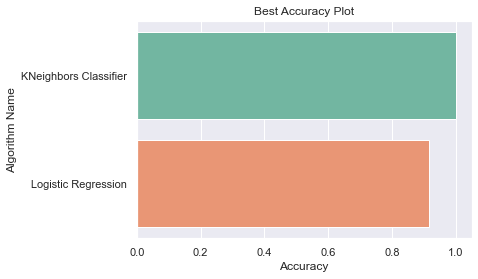

In [43]:
sns.set()
sns.barplot(y="Algorithm Name", x="Accuracy",  data=accuracy_df, palette="Set2").set(title='Best Accuracy Plot')
sns.set(rc={'figure.figsize':(10,5)})